https://github.com/jfh5580/STAT6289/tree/main/codes/NLP

## Magnitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!python --version

Python 3.7.16


In [3]:
from pymagnitude import *

Constructing a Magnitude Object

In [4]:
vectors = Magnitude('GoogleNews-vectors-negative300.magnitude')

In [5]:
vectors.distance("cat","dog")

0.69145405

### 1.What is the dimensionality of these word embeddings? Provide an integer answer.

In [6]:
dimensionality = vectors.dim
print(f"Dimensionality of word embeddings: {dimensionality}")

Dimensionality of word embeddings: 300


In this case, with a dimensionality of 300, each word is represented as a vector in a 300-dimensional space

In order to check if the shape of vector is 300, I check the vector for 'cat' and 'dog'

In [7]:
# Access the vector for the word 'cat'
vector_cat = vectors.query('cat')

print(f"Vector representation of 'cat':\n{vector_cat}")

Vector representation of 'cat':
[ 0.0040587  0.0671903 -0.0938735  0.0713696  0.0388996  0.0273262
  0.0163957 -0.0031345  0.0726555 -0.0414715  0.0265225 -0.1928908
 -0.0014668 -0.0977313 -0.00432   -0.0274869  0.0166368  0.0498301
 -0.1478829 -0.0044606  0.0707266 -0.0485442  0.0739415 -0.04115
 -0.0319877  0.0819786 -0.0951595  0.1202353  0.1356665 -0.0282906
 -0.0258795 -0.0649399 -0.0298981 -0.0466153 -0.0337559  0.0430789
 -0.0011403  0.0237899  0.0145472  0.1138056  0.0245936 -0.0369707
  0.0221824  0.0369707  0.0065101 -0.0406678  0.0691192 -0.0237899
 -0.0091623  0.0182443 -0.1099478  0.0281299  0.1131626  0.0459723
  0.016235  -0.0443649  0.0536879 -0.1228071  0.1305228  0.0352026
  0.072977   0.0700837 -0.0295766  0.0681547  0.0294158 -0.0271655
  0.0196106  0.0335951 -0.0633325 -0.0298981  0.1620283  0.0130201
 -0.0233076 -0.000658  -0.0758704  0.084229   0.0295766 -0.0350418
  0.0003466 -0.0193695  0.0167976 -0.0096044  0.063654  -0.0466153
 -0.1099478  0.026844  -0.090658

In [8]:
# Access the vector for the word 'dog'
vector_dog = vectors.query('dog')

print(f"Vector representation of 'dog':\n{vector_dog}")

Vector representation of 'dog':
[ 1.719810e-02 -7.493400e-03 -5.798200e-02  5.405100e-02 -2.833580e-02
  1.924540e-02  1.965490e-02 -2.768070e-02 -5.159400e-03 -2.129280e-02
  6.027510e-02 -1.421706e-01 -7.575300e-03 -5.568890e-02 -8.435200e-03
  3.603400e-02 -6.682670e-02  5.339590e-02 -6.289580e-02 -4.029260e-02
  5.208550e-02 -3.324960e-02  4.782700e-02 -5.503380e-02 -2.997380e-02
  6.715430e-02 -5.012010e-02  1.074469e-01  1.100676e-01  8.189600e-03
 -3.259440e-02 -2.751690e-02 -1.220240e-02 -2.882720e-02 -3.308580e-02
  2.610400e-03 -4.504300e-03  1.768940e-02  4.979250e-02  1.120331e-01
  5.568900e-03 -7.141290e-02 -5.057000e-03  1.760750e-02 -3.603400e-02
 -2.981000e-02  8.353340e-02 -2.358590e-02 -5.364200e-03  2.538760e-02
 -2.358590e-02  3.996500e-02  7.698180e-02  4.749900e-03  3.865470e-02
  2.518300e-03  9.237810e-02 -8.189550e-02  9.958490e-02  1.171110e-02
  8.124030e-02  4.553390e-02  4.782700e-02  5.896500e-03  9.827500e-03
 -4.078400e-02  7.657200e-03 -1.596960e-02 -5

### 2. What are the top-5 most similar words to picnic (not including picnic itself)?

In [9]:
query_word = 'picnic'
top_similar_words = vectors.most_similar(query_word, topn=5)

print(f"Top-5 most similar words to '{query_word}':")
for (word, similarity) in enumerate(top_similar_words[0:], 1):  # Exclude the first entry ('picnic' itself)
    print(f"{word}: {similarity}")

Top-5 most similar words to 'picnic':
1: ('picnics', 0.7400875)
2: ('picnic_lunch', 0.721374)
3: ('Picnic', 0.700534)
4: ('potluck_picnic', 0.6683274)
5: ('picnic_supper', 0.65189123)


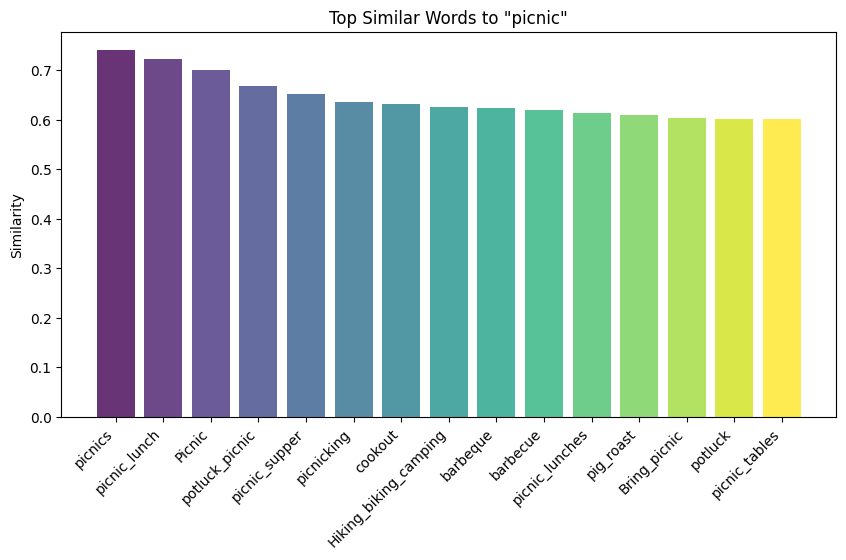

In [10]:
query_word = 'picnic'
top_similar_words = vectors.most_similar(query_word, topn=15)

# Extract words and similarities
words = [word for word, _ in top_similar_words ]
similarities = [similarity for _, similarity in top_similar_words]

# Generate a range of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(words, similarities, color=colors, alpha=0.8)

plt.ylabel('Similarity')
plt.title('Top Similar Words to "picnic"')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']


In [29]:
# Question 3: Which word is not like the others?
words_to_compare = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
doesnt_match_word = vectors.doesnt_match(words_to_compare)
print(f"The word not like the others: {doesnt_match_word}")

The word not like the others: tissue


### 4. Solve the following analogy: leg is to jump as X is to throw.


In [34]:
analogy_results = vectors.most_similar(positive=['leg', 'throw'], negative=['jump'])

print("Solutions to the analogy 'leg is to jump as X is to throw':")
for rank, (word, similarity) in enumerate(analogy_results, 1):
    print(f"{rank}. {word}: {similarity}")

Solutions to the analogy 'leg is to jump as X is to throw':
1. forearm: 0.482946515083313
2. shin: 0.473761647939682
3. elbow: 0.4679689109325409
4. metacarpal_bone: 0.46781474351882935
5. metacarpal_bones: 0.46605822443962097
6. ankle: 0.4643442630767822
7. shoulder: 0.46183353662490845
8. thigh: 0.4539368152618408
9. knee: 0.445570707321167
10. ulna_bone: 0.4423491060733795


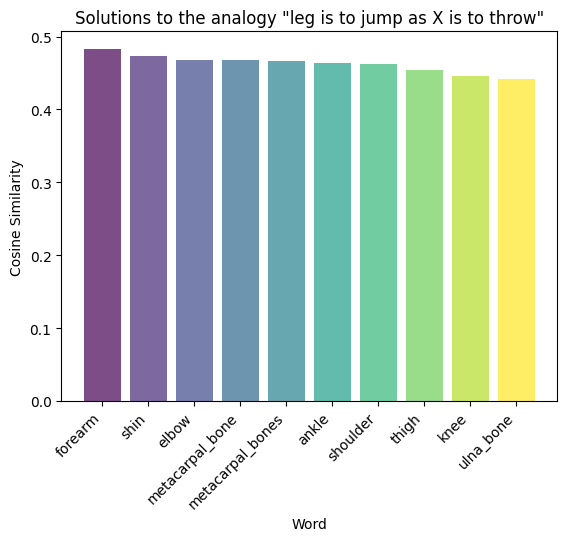

In [46]:
# Extract words and similarities
words = [word for rank, (word, similarity) in enumerate(analogy_results, 1)]
similarities = [similarity for rank, (word, similarity) in enumerate(analogy_results, 1)]

# Generate a range of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(analogy_results)))

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(range(1, len(analogy_results) + 1), similarities, tick_label=words, color=colors, alpha=0.7)


ax.set_title('Solutions to the analogy "leg is to jump as X is to throw"')
ax.set_xlabel('Word')
ax.set_ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.show()

## Different methods - gensim - Word2Vec

In [51]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [58]:
# Load the pre-trained Word2Vec model (Google News vectors)
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [59]:
# 1. What is the dimensionality of these word embeddings? Provide an integer answer.
dimensionality = word2vec_model.vector_size
print(f"Dimensionality of word embeddings: {dimensionality}")

# 2. What are the top-5 most similar words to 'picnic' (not including 'picnic' itself)?
top_similar_words = word2vec_model.most_similar('picnic', topn=5)
print(f"Top-5 most similar words to 'picnic': {[word for word, _ in top_similar_words]}")

# 3. According to the word embeddings, which of these words is not like the others?
words_to_compare = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
odd_one_out = word2vec_model.doesnt_match(words_to_compare)
print(f"The word not like the others: {odd_one_out}")

# 4. Solve the following analogy: leg is to jump as X is to throw.
analogy_results = word2vec_model.most_similar(positive=['leg', 'throw'], negative=['jump'])
print("Solutions to the analogy 'leg is to jump as X is to throw':")
for rank, (word, similarity) in enumerate(analogy_results, 1):
    print(f"{rank}. {word}: {similarity}")

Dimensionality of word embeddings: 300
Top-5 most similar words to 'picnic': ['picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic', 'picnic_supper']
The word not like the others: tissue
Solutions to the analogy 'leg is to jump as X is to throw':
1. forearm: 0.4829465448856354
2. shin: 0.4737616777420044
3. elbow: 0.4679689109325409
4. metacarpal_bone: 0.46781474351882935
5. metacarpal_bones: 0.4660581946372986
6. ankle: 0.4643442928791046
7. shoulder: 0.46183353662490845
8. thigh: 0.4539368748664856
9. knee: 0.445570707321167
10. ulna_bone: 0.44234907627105713
